In [757]:
#Importação do arquivo
import pandas as pd
import numpy as np

In [758]:
# Criar leitura
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding= 'latin1')
#Printar DataFrame
#print(df.head(5))
#print(df.describe())
#print(df.tail(5))

In [759]:
df_furto_celular = df.groupby('cisp')['furto_celular'].sum().reset_index()
df_furto_celular = df_furto_celular.sort_values(by='furto_celular', ascending= False)
print(df_furto_celular)

     cisp  furto_celular
12     16          24879
2       5          23117
10     14          16945
8      12          16008
0       1          14968
..    ...            ...
87    104             72
77     92             63
131   157             55
114   138             52
129   155             47

[138 rows x 2 columns]


In [760]:
array_furto_celular = np.array(df_furto_celular['furto_celular'])


In [761]:
media  = np.mean(array_furto_celular)
mediana  = np.median(array_furto_celular)
q1 = np.quantile(array_furto_celular, 0.25)
q2 = np.quantile(array_furto_celular, 0.50)
q3 = np.quantile(array_furto_celular, 0.75)
distancia = ( media - mediana ) / mediana
iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)


In [762]:
print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2), Mediana: {q2}')
print(f'Primeiro quartil (Q3): {q3}')
print(f'A distancia entre a media e a mediana é de {distancia * 100}')
print(f'O valor do limite superior é {limite_superior}')
print(f'O valor do limite inferior é {limite_inferior}')

A média é 3338.1159420289855
A mediana é 1633.5
Primeiro quartil (Q1): 449.0
Segundo quartil (Q2), Mediana: 1633.5
Primeiro quartil (Q3): 4498.25
A distancia entre a media e a mediana é de 104.35359302289473
O valor do limite superior é 10572.125
O valor do limite inferior é -5624.875


In [763]:

outlier_furto_celular = df_furto_celular.loc[df_furto_celular['furto_celular'] > limite_superior]
outlier_furto_celular

,cisp,furto_celular
12,16,24879
2,5,23117
10,14,16945
8,12,16008
0,1,14968
5,9,14159
6,10,14105
1,4,13318
14,18,12939
28,32,12206


In [764]:
df =pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep = ';')

In [765]:
df_capital = df.loc[df['munic'] == 'Rio de Janeiro']
df_capital['veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']

C:\Users\stephany.andrade\AppData\Local\Temp\ipykernel_19680\414495733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capital['veiculo'] = df_capital['furto_veiculos'] + df_capital['roubo_veiculo']


In [766]:
df_veiculo_capital = df_capital.groupby('cisp')['veiculo'].sum().reset_index()
df_veiculo_capital = df_veiculo_capital.sort_values(by='veiculo', ascending= False)
df_veiculo_capital.head(5)


,cisp,veiculo
23,27,39024
30,34,36897
31,35,33436
35,39,32500
34,38,25999


In [767]:
array_veiculo_capital = np.array(df_veiculo_capital['veiculo'])

In [768]:
media  = np.mean(array_veiculo_capital)
mediana  = np.median(array_veiculo_capital)
q1 = np.quantile(array_veiculo_capital, 0.25)
q2 = np.quantile(array_veiculo_capital, 0.50)
q3 = np.quantile(array_veiculo_capital, 0.75)
distancia = ( media - mediana ) / mediana
iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

print(f'A média é {media}')
print(f'A mediana é {mediana}')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2), Mediana: {q2}')
print(f'Primeiro quartil (Q3): {q3}')
print(f'A distancia entre a media e a mediana é de {distancia * 100}')
print(f'O valor do limite superior é {limite_superior}')
print(f'O valor do limite inferior é {limite_inferior}')

A média é 13949.333333333334
A mediana é 12701.0
Primeiro quartil (Q1): 5015.25
Segundo quartil (Q2), Mediana: 12701.0
Primeiro quartil (Q3): 18068.75
A distancia entre a media e a mediana é de 9.8286224181823
O valor do limite superior é 37649.0
O valor do limite inferior é -14565.0


In [769]:
#resultado exercicio 1

outlier_furto_celular = df_veiculo_capital.loc[df_veiculo_capital['veiculo'] > limite_superior]
outlier_furto_celular

,cisp,veiculo
23,27,39024


![Alt text](image.png)

In [770]:
df=pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep = ';' , encoding='latin1')

In [771]:
decada=df.groupby('fmun')['furto_veiculos'].sum().reset_index()
decada=df.groupby('regiao').sum().reset_index()
decada

,regiao,fmun_cod,fmun,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,Baixada Fluminense,6100609045,Belford RoxoDuque de CaxiasGuapimirimItaguaíJa...,3729879,11873,2014m012014m012014m012014m012014m012014m012014...,15081,110,450,15641,...,36412,1434,161154,16964,763,77,43,2,1762080,5489
1,Capital,469247094,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,286758,913,2014m012014m022014m032014m042014m052014m062014...,13135,239,582,13956,...,66576,9195,267081,27234,1687,119,119,18,4541615,422
2,Grande Niterói,1407348652,MaricáNiteróiSão GonçaloMaricáNiteróiSão Gonça...,860274,2739,2014m012014m012014m012014m022014m022014m022014...,4219,47,198,4464,...,15102,1478,62624,5258,331,39,23,1,868130,1266
3,Interior,35178170064,Angra dos ReisAperibéAraruamaArealArmação dos ...,21506850,68475,2014m012014m012014m012014m012014m012014m012014...,14591,147,304,15042,...,58207,3650,246934,12950,1976,171,34,6,2057549,31650


In [772]:
q1=decada['furto_veiculos'].quantile(0.25)
q2=decada['furto_veiculos'].quantile(0.50)
q3=decada['furto_veiculos'].quantile(0.75)
limite_inferior=q1-(1.5*iqr)
limite_superior=q3+(1.5*iqr)


In [773]:
#identificar os municípios outlier

outlier=decada[(decada['furto_veiculos'] < limite_inferior)]
outlier=decada[(decada['furto_veiculos'] > limite_superior)]

print("Municípios considerados outliers na última decada: ")
print(outlier if not outlier.empty else 'Nenhum município é outlier')

Municípios considerados outliers na última decada: 
    regiao   fmun_cod                                               fmun  \
1  Capital  469247094  Rio de JaneiroRio de JaneiroRio de JaneiroRio ...   

      ano  mes                                            mes_ano  hom_doloso  \
1  286758  913  2014m012014m022014m032014m042014m052014m062014...       13135   

   lesao_corp_morte  latrocinio   cvli  ...    cmp  cmba  ameaca  \
1               239         582  13956  ...  66576  9195  267081   

   pessoas_desaparecidas  encontro_cadaver  encontro_ossada  \
1                  27234              1687              119   

   pol_militares_mortos_serv  pol_civis_mortos_serv  registro_ocorrencias  \
1                        119                     18               4541615   

   fase  
1   422  

[1 rows x 60 columns]


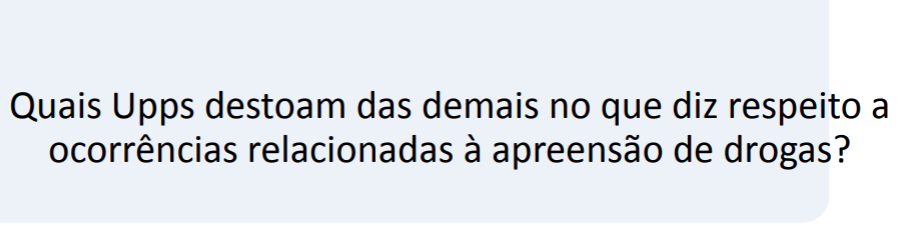

In [774]:
#carregar base de dados
df=pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep= ';', encoding= 'latin1')

In [775]:
#Somar apreensões por UPP

ocorrencias=df.groupby('fmun_cod')['apreensao_drogas'].sum().reset_index
ocorrencias

<bound method Series.reset_index of fmun_cod
3300100    4445
3300159     386
3300209    3834
3300225     218
3300233    1587
           ... 
3306008    6707
3306107    3467
3306156     184
3306206    2111
3306305    7578
Name: apreensao_drogas, Length: 92, dtype: int64>

In [776]:
#Calculo do iqr para o outlier 

q1=ocorrencias['apreensao_drogas'].quantile(0.25)
q2=ocorrencias['apreensao_drogas'].quantile(0.50)
q3=ocorrencias['apreensao_drogas'].quantile(0.75)
limite_inferior=q1-(1.5*iqr)
limite_superior=q3+(1.5*iqr)

print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2, Mediana): {q2}')
print(f'Terceiro quartil (Q3): {q3}')

TypeError: 'method' object is not subscriptable

In [ ]:
#identificar as upps que se destoam

outlier =ocorrencias[(ocorrencias['apreensao_drogas'] < limite_inferior)]
outlier =ocorrencias[(ocorrencias['apreensao_drogas'] > limite_superior)]

TypeError: 'method' object is not subscriptable